In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('MockECEDataset 090622.xlsx',sheet_name='Dataset')

In [3]:
df

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred
0,2019-2020,2019SU,1,Asian,Female,Child Dev Pre-School Ed-AC,0282,College Certificate FA-Yes,No,Neither
1,2022-2023,2022FA,2,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither
2,2019-2020,2020SP,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated
3,2020-2021,2020FA,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated
4,2019-2020,2020SP,4,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated
...,...,...,...,...,...,...,...,...,...,...
2999,2022-2023,2022FA,1130,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither
3000,2022-2023,2022FA,1131,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither
3001,2022-2023,2022FA,1132,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither
3002,2022-2023,2022FA,1133,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither


In [4]:
df = df.replace(['2019SU','2020SU','2021SU','2021SU','2022SU'],'SU')
df = df.replace(['2019FA','2020FA','2021FA','2021FA','2022FA'],'FA')
df = df.replace(['2019SP','2020SP','2021SP','2021SP','2022SP'],'SP')

In [5]:
semester=[]
for j in range(2019,2023):
    for x in ['SP','SU','FA']:
        semester.append(str(j)+x)
semester=semester[1:]
key = {x:j for j,x in enumerate(semester)}
df['semester']= df['Term'].replace(to_replace=key)
df = df.sort_values(by=['StudentID','semester'])

In [6]:
df_black= df[df['Ethnicity']=='Black']
df_hispanic = df[df['Ethnicity']=='Hispanic']

In [7]:
def enrolled(df):
#    students_enrolled = df[df['StillEnrolled']=='Yes']
    students_enrolled = df
    students_enrolled_dummies = pd.get_dummies(students_enrolled[['Academic Year','Term']], columns = ['Term'])
    se = pd.DataFrame(students_enrolled_dummies.groupby(by='Academic Year').sum())
    se= se[['Term_SU','Term_FA','Term_SP']]
    se.columns=['SU','FA','SP']
    print(se)
    se.plot.bar(color=['green','red','blue'])
    return

                  SU     FA     SP
Academic Year                     
2019-2020      123.0  351.0  370.0
2020-2021      123.0  326.0  326.0
2021-2022      120.0  332.0  344.0
2022-2023      158.0  431.0    0.0


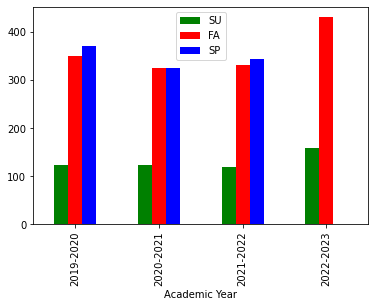

In [8]:
enrolled(df)

               SU   FA   SP
Academic Year              
2019-2020      49  156  170
2020-2021      52  140  138
2021-2022      57  133  137
2022-2023      59  183    0


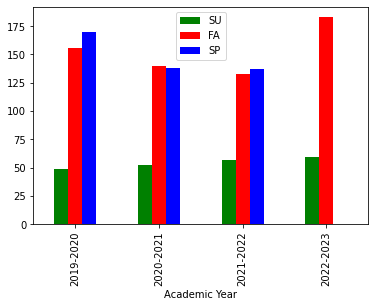

In [9]:
enrolled(df_black)

               SU   FA   SP
Academic Year              
2019-2020      53  156  166
2020-2021      63  156  157
2021-2022      51  170  175
2022-2023      81  199    0


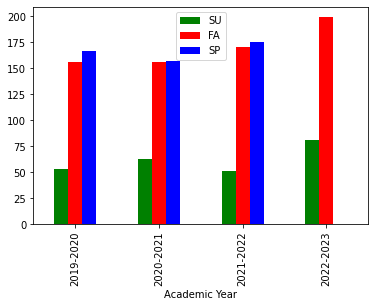

In [10]:
enrolled(df_hispanic)

In [11]:
def graduated(df):
    df_latest = df.drop_duplicates(subset='StudentID',keep='last')
    sg = df_latest[(df_latest['GraduatedTransferred']=='Graduated') | (df_latest['GraduatedTransferred']=='Graduated and Transferred')]
    students_enrolled_dummies = pd.get_dummies(sg[['Academic Year','Term']], columns = ['Term'])
    sg = pd.DataFrame(students_enrolled_dummies.groupby(by='Academic Year').sum())
    sg= sg[['Term_SU','Term_FA','Term_SP']]
    sg.columns=['SU','FA','SP']
    sg['TO'] = sg['SU']+sg['FA']+sg['SP']
    print(sg)
    sg.plot.bar(color=['green','red','blue','black'])
    return

               SU  FA  SP   TO
Academic Year                 
2019-2020      49  45  79  173
2020-2021      54  16  70  140
2021-2022      41  12  48  101
2022-2023      27   0   0   27


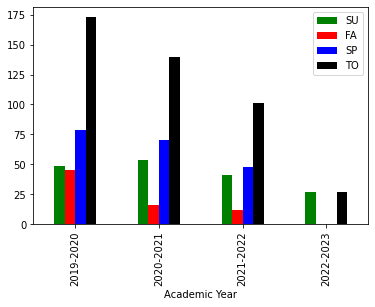

In [12]:
graduated(df)

               SU  FA  SP  TO
Academic Year                
2019-2020      22  21  37  80
2020-2021      22  10  32  64
2021-2022      26   2  22  50
2022-2023       7   0   0   7


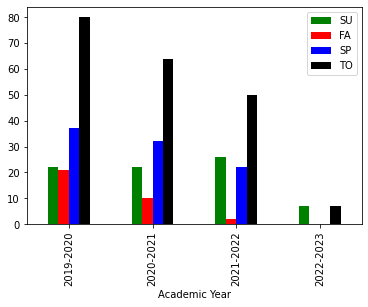

In [13]:
graduated(df_black)

               SU  FA  SP  TO
Academic Year                
2019-2020      18  17  34  69
2020-2021      27   5  31  63
2021-2022      12   8  24  44
2022-2023      18   0   0  18


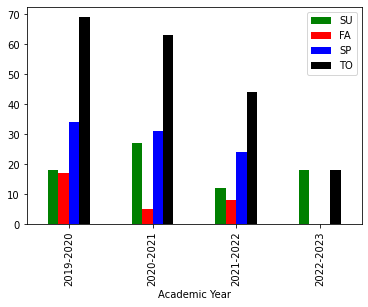

In [14]:
graduated(df_hispanic)

In [15]:
def dropped(df):
    df_latest = df.drop_duplicates(subset='StudentID',keep='last')
    sd = df_latest[(df_latest['GraduatedTransferred']=='Neither') & (df_latest['StillEnrolled']=='No')]
    students_enrolled_dummies = pd.get_dummies(sd[['Academic Year','Term']], columns = ['Term'])
    sg = pd.DataFrame(students_enrolled_dummies.groupby(by='Academic Year').sum())
    sg= sg[['Term_SU','Term_FA','Term_SP']]
    sg.columns=['SU','FA','SP']
    sg['TO'] = sg['SU']+sg['FA']+sg['SP']
    print(sg)
    sg.plot.bar(color=['green','red','blue','black'])
    return

               SU  FA  SP   TO
Academic Year                 
2019-2020      31  20  53  104
2020-2021      19   6  29   54
2021-2022      24   7  20   51
2022-2023      17   0   0   17


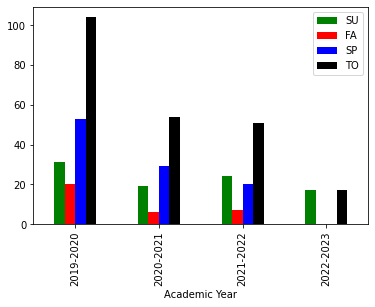

In [16]:
dropped(df)

               SU  FA  SP  TO
Academic Year                
2019-2020      14   9  33  56
2020-2021       8   3   8  19
2021-2022      12   4   9  25
2022-2023       6   0   0   6


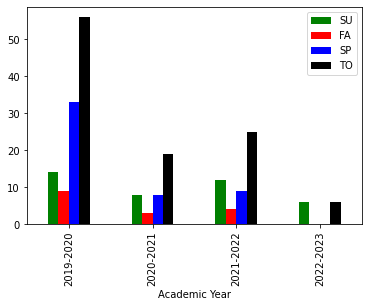

In [17]:
dropped(df_black)

               SU  FA  SP  TO
Academic Year                
2019-2020      11  10  15  36
2020-2021      11   1  16  28
2021-2022      10   1   8  19
2022-2023       8   0   0   8


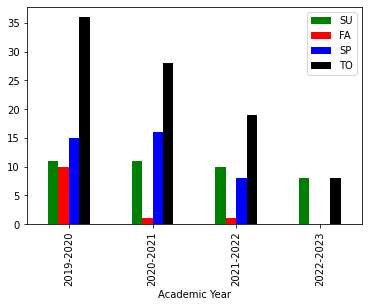

In [18]:
dropped(df_hispanic)

In [19]:
fall=[]
for j in range(2019,2023):
    fall.append('Term_'+str(j)+'FA')
spring=[]
for j in range(2020,2023):
    spring.append('Term_'+str(j)+'SP')
summer=[]
for j in range(2019,2023):
    summer.append('Term_'+str(j)+'SU')
semester=[]
for j in range(2019,2023):
    for x in ['SP','SU','FA']:
        semester.append(str(j)+x)
semester=semester[1:]
key = {x:j for j,x in enumerate(semester)}

In [20]:
df['Term'].value_counts()

FA    1440
SP    1040
SU     524
Name: Term, dtype: int64

In [21]:
key

{'2019SU': 0,
 '2019FA': 1,
 '2020SP': 2,
 '2020SU': 3,
 '2020FA': 4,
 '2021SP': 5,
 '2021SU': 6,
 '2021FA': 7,
 '2022SP': 8,
 '2022SU': 9,
 '2022FA': 10}

In [22]:
df['StudentID'].value_counts()[df['StudentID'].value_counts()>1]

237     11
659     10
921      9
287      9
483      9
        ..
538      2
371      2
369      2
1013     2
931      2
Name: StudentID, Length: 708, dtype: int64

In [23]:
df['semester']= df['Term'].replace(to_replace=key)

In [24]:
df

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester
0,2019-2020,SU,1,Asian,Female,Child Dev Pre-School Ed-AC,0282,College Certificate FA-Yes,No,Neither,SU
1,2022-2023,FA,2,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3,2020-2021,FA,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,FA
2,2019-2020,SP,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP
6,2020-2021,FA,4,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,FA
...,...,...,...,...,...,...,...,...,...,...,...
2999,2022-2023,FA,1130,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3000,2022-2023,FA,1131,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3001,2022-2023,FA,1132,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3002,2022-2023,FA,1133,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA


In [25]:
df_sorted = df.sort_values(by=['StudentID','semester'])

In [26]:
df_latest = df_sorted.drop_duplicates(subset='StudentID',keep='last')

In [27]:
df_latest

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester
0,2019-2020,SU,1,Asian,Female,Child Dev Pre-School Ed-AC,0282,College Certificate FA-Yes,No,Neither,SU
1,2022-2023,FA,2,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
2,2019-2020,SP,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP
8,2021-2022,SU,4,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SU
11,2022-2023,FA,5,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
...,...,...,...,...,...,...,...,...,...,...,...
2999,2022-2023,FA,1130,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3000,2022-2023,FA,1131,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3001,2022-2023,FA,1132,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
3002,2022-2023,FA,1133,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA


In [28]:
df_latest['Ethnicity'].value_counts()

Black                        508
Hispanic                     498
White                         67
Asian                         41
Multi-Racial Non-Hispanic     16
Am. Ind                        2
Not Specif                     2
Name: Ethnicity, dtype: int64

In [29]:
df_latest['Gender'].value_counts()

Female     1095
Male         37
(Blank)       2
Name: Gender, dtype: int64

In [30]:
df_latest['graduated'] = [1 if (x=='Graduated') or (x=='Graduated and Transferred') else 0 for x in df_latest['GraduatedTransferred']]

/var/folders/qc/g6yf7hvd019dnqj11v94qpbw0000gn/T/ipykernel_6556/4015435891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['graduated'] = [1 if (x=='Graduated') or (x=='Graduated and Transferred') else 0 for x in df_latest['GraduatedTransferred']]


In [31]:
df_latest

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester,graduated
0,2019-2020,SU,1,Asian,Female,Child Dev Pre-School Ed-AC,0282,College Certificate FA-Yes,No,Neither,SU,0
1,2022-2023,FA,2,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0
2,2019-2020,SP,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP,1
8,2021-2022,SU,4,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SU,1
11,2022-2023,FA,5,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2999,2022-2023,FA,1130,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0
3000,2022-2023,FA,1131,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0
3001,2022-2023,FA,1132,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0
3002,2022-2023,FA,1133,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA,0


In [32]:
df_latest[df_latest.graduated==1]

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester,graduated
2,2019-2020,SP,3,Hispanic,Male,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP,1
8,2021-2022,SU,4,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SU,1
20,2021-2022,SU,7,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SU,1
22,2021-2022,SP,8,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP,1
27,2021-2022,FA,11,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated and Transferred,FA,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2942,2021-2022,SP,1087,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP,1
2949,2022-2023,SU,1091,Hispanic,Female,Child Dev Pre-School Ed-BC,0277,College Certificate FA-Yes,No,Graduated,SU,1
2956,2021-2022,SP,1096,Hispanic,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,No,Graduated,SP,1
2981,2021-2022,SP,1113,Hispanic,Female,Human Dev and Family Stu-BC,0425,College Certificate FA-Yes,No,Graduated and Transferred,SP,1


In [33]:
df_latest[['Academic Program','graduated']].groupby(['Academic Program']).sum()

,graduated
Academic Program,
Associate in Applied Science,365
Associate in Arts,14
College Certificate FA-No,1
College Certificate FA-Yes,61


In [34]:
df_latest[['Academic Plan','graduated']].groupby(['Academic Plan']).sum()

,graduated
Academic Plan,
ChDev-PreSchlEd/Infant Todd-AC,9
Child Dev Pre-School Ed-AAS,358
Child Dev Pre-School Ed-AC,18
Child Dev Pre-School Ed-BC,29
Child Development: Early Ch-AA,14
Early Child Sp Ed Endors - BC,0
Human Dev & Family Studies-AAS,7
Human Dev and Family Stu-BC,6


In [35]:
df[df['Gender']=='(Blank)']

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester
1742,2022-2023,FA,654,Hispanic,(Blank),Child Dev Pre-School Ed-BC,0277,College Certificate FA-Yes,Yes,Neither,FA
2012,2021-2022,FA,751,White,(Blank),Child Dev Pre-School Ed-BC,0277,College Certificate FA-Yes,No,Graduated and Transferred,FA
2013,2021-2022,SP,751,White,(Blank),Child Dev Pre-School Ed-BC,0277,College Certificate FA-Yes,No,Graduated and Transferred,SP


In [36]:
df_latest['Academic Plan'].value_counts()

Child Dev Pre-School Ed-AAS       847
Child Dev Pre-School Ed-BC        139
Child Development: Early Ch-AA     52
Child Dev Pre-School Ed-AC         45
Human Dev & Family Studies-AAS     20
ChDev-PreSchlEd/Infant Todd-AC     18
Human Dev and Family Stu-BC         8
Early Child Sp Ed Endors - BC       5
Name: Academic Plan, dtype: int64

In [37]:
df_latest['Academic Plan Code'].value_counts()

0278      847
0277      139
0210K      52
0282       45
0391       20
0286       18
0425        8
0429SP      5
Name: Academic Plan Code, dtype: int64

In [38]:
df_latest['Academic Program'].value_counts()

Associate in Applied Science    867
College Certificate FA-Yes      207
Associate in Arts                52
College Certificate FA-No         8
Name: Academic Program, dtype: int64

In [39]:
df_latest['StillEnrolled'].value_counts()

No     703
Yes    431
Name: StillEnrolled, dtype: int64

In [40]:
df_latest['GraduatedTransferred'].value_counts()

Neither                      657
Graduated                    327
Graduated and Transferred    114
Transferred                   36
Name: GraduatedTransferred, dtype: int64

In [41]:
df_latest[df_latest['StillEnrolled']=='Yes']['GraduatedTransferred'].value_counts()

Neither    431
Name: GraduatedTransferred, dtype: int64

In [42]:
df_latest[df_latest['StillEnrolled']=='No']['GraduatedTransferred'].value_counts()

Graduated                    327
Neither                      226
Graduated and Transferred    114
Transferred                   36
Name: GraduatedTransferred, dtype: int64

In [43]:
df[df['StudentID']==237]

,Academic Year,Term,StudentID,Ethnicity,Gender,Academic Plan,Academic Plan Code,Academic Program,StillEnrolled,GraduatedTransferred,semester
603,2019-2020,FA,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
606,2020-2021,FA,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
609,2021-2022,FA,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
612,2022-2023,FA,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,FA
604,2019-2020,SP,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,SP
607,2020-2021,SP,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,SP
610,2021-2022,SP,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,SP
602,2019-2020,SU,237,Black,Female,Child Development: Early Ch-AA,0210K,Associate in Arts,Yes,Neither,SU
605,2020-2021,SU,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,SU
608,2021-2022,SU,237,Black,Female,Child Dev Pre-School Ed-AAS,0278,Associate in Applied Science,Yes,Neither,SU


In [44]:
students = df[['StudentID','Ethnicity','Gender','StillEnrolled','GraduatedTransferred']].drop_duplicates()

In [45]:
students

,StudentID,Ethnicity,Gender,StillEnrolled,GraduatedTransferred
0,1,Asian,Female,No,Neither
1,2,Hispanic,Female,Yes,Neither
3,3,Hispanic,Male,No,Graduated
6,4,Hispanic,Female,No,Graduated
11,5,Black,Female,Yes,Neither
...,...,...,...,...,...
2999,1130,Black,Female,Yes,Neither
3000,1131,Hispanic,Male,Yes,Neither
3001,1132,Hispanic,Female,Yes,Neither
3002,1133,Black,Female,Yes,Neither


In [46]:
students.StudentID.value_counts().sort_values()

1       1
35      1
10      1
16      1
15      1
       ..
1132    1
1133    1
1127    1
1128    1
1134    1
Name: StudentID, Length: 1134, dtype: int64

In [47]:
students_gone = students[(students['StillEnrolled']=='No')&(students['GraduatedTransferred']=='Neither')]

In [48]:
students_gone

,StudentID,Ethnicity,Gender,StillEnrolled,GraduatedTransferred
0,1,Asian,Female,No,Neither
13,6,Black,Female,No,Neither
25,9,Black,Female,No,Neither
26,10,Black,Female,No,Neither
50,20,Black,Female,No,Neither
...,...,...,...,...,...
2945,1089,Asian,Male,No,Neither
2947,1090,Black,Female,No,Neither
2950,1092,White,Female,No,Neither
2970,1106,Black,Female,No,Neither


In [49]:
226/1134

0.19929453262786595

In [50]:
students['Ethnicity'].value_counts()

Black                        508
Hispanic                     498
White                         67
Asian                         41
Multi-Racial Non-Hispanic     16
Am. Ind                        2
Not Specif                     2
Name: Ethnicity, dtype: int64

In [51]:
students_gone['Ethnicity'].value_counts()

Black                        106
Hispanic                      91
White                         18
Asian                          8
Am. Ind                        1
Not Specif                     1
Multi-Racial Non-Hispanic      1
Name: Ethnicity, dtype: int64

In [52]:
106/508

0.20866141732283464

In [53]:
91/498

0.1827309236947791

In [54]:
18/67

0.26865671641791045

In [55]:
8/41

0.1951219512195122

In [56]:
students_plan = df[['StudentID','Ethnicity','Gender','StillEnrolled','GraduatedTransferred','Academic Plan Code']].drop_duplicates()

In [57]:
students_plan

,StudentID,Ethnicity,Gender,StillEnrolled,GraduatedTransferred,Academic Plan Code
0,1,Asian,Female,No,Neither,0282
1,2,Hispanic,Female,Yes,Neither,0278
3,3,Hispanic,Male,No,Graduated,0278
6,4,Hispanic,Female,No,Graduated,0278
11,5,Black,Female,Yes,Neither,0278
...,...,...,...,...,...,...
2999,1130,Black,Female,Yes,Neither,0278
3000,1131,Hispanic,Male,Yes,Neither,0278
3001,1132,Hispanic,Female,Yes,Neither,0278
3002,1133,Black,Female,Yes,Neither,0278
